In [19]:
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd

def Random_Points_in_Bounds(polygon, number):
    bds = polygon.bounds
    x = np.random.uniform(bds.minx, bds.maxx, number)
    y = np.random.uniform(bds.miny, bds.maxy, number)
    return x, y

In [41]:
hd = gpd.read_file("../geodata/hd.geojson")
hd = hd.set_crs("EPSG:4326")
hd['poly'] = 'poly'
hd.set_index('poly', inplace=True)
hd.head()

,id,@id,@relations,TMC:cid_58:tabcd_1:Class,TMC:cid_58:tabcd_1:LCLversion,TMC:cid_58:tabcd_1:LocationCode,admin_level,admin_title,admin_title:de,alt_name:ar,...,population:2024,population:census:2022,population:date,ref:nuts:3,source,source:population:2024,type,wikidata,wikipedia,geometry
poly,,,,,,,,,,,,,,,,,,,,,
poly,relation/285864,relation/285864,None,Area,8.00,456,6,independent town,Kreisfreie Stadt,هايدلبرج,...,"155,756","153,809",2024-12-31,DE125,"LGL, www.lgl-bw.de",estimate,boundary,Q2966,de:Heidelberg,"POLYGON ((8.63323 49.35284, 8.63329 49.35394, ..."


<Axes: >

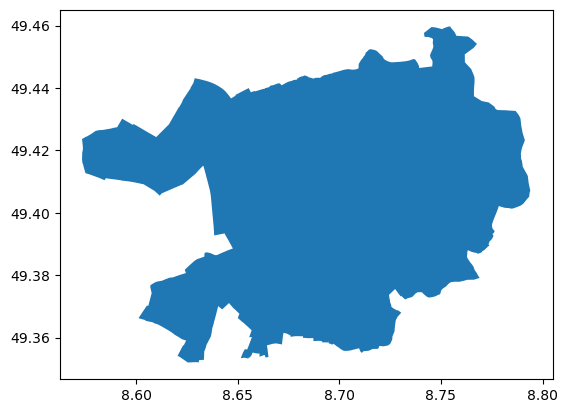

In [5]:
hd.plot()

In [17]:
minx, miny, maxx, maxy = hd.bounds
print(minx, miny, maxx, maxy)

0    8.573179
Name: minx, dtype: float64

In [18]:
bounds_value = hd.bounds
print(type(bounds_value))
print(bounds_value)

<class 'pandas.core.frame.DataFrame'>
       minx       miny      maxx       maxy
0  8.573179  49.352003  8.793986  49.459693


In [58]:
import pandas as pd

x,y = Random_Points_in_Bounds(hd, 400)


In [59]:
df = pd.DataFrame()
df['points'] = list(zip(x,y))
df['points'] = df['points'].apply(Point)
gdf_points = gpd.GeoDataFrame(df, geometry='points')

gdf_points = gdf_points.set_crs("EPSG:4326")

gdf_points

,points
0,POINT (8.76159 49.3569)
1,POINT (8.65382 49.387)
2,POINT (8.72166 49.4037)
3,POINT (8.76909 49.40968)
4,POINT (8.78969 49.38534)
...,...
395,POINT (8.70227 49.4162)
396,POINT (8.64149 49.40639)
397,POINT (8.75599 49.42449)
398,POINT (8.71494 49.37516)


In [60]:
Sjoin = gpd.tools.sjoin(gdf_points, hd, predicate="within", how='left')
Sjoin


,points,poly,id,@id,@relations,TMC:cid_58:tabcd_1:Class,TMC:cid_58:tabcd_1:LCLversion,TMC:cid_58:tabcd_1:LocationCode,admin_level,admin_title,...,population,population:2024,population:census:2022,population:date,ref:nuts:3,source,source:population:2024,type,wikidata,wikipedia
0,POINT (8.76159 49.3569),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (8.65382 49.387),poly,relation/285864,relation/285864,None,Area,8.00,456,6,independent town,...,155756,"155,756","153,809",2024-12-31,DE125,"LGL, www.lgl-bw.de",estimate,boundary,Q2966,de:Heidelberg
2,POINT (8.72166 49.4037),poly,relation/285864,relation/285864,None,Area,8.00,456,6,independent town,...,155756,"155,756","153,809",2024-12-31,DE125,"LGL, www.lgl-bw.de",estimate,boundary,Q2966,de:Heidelberg
3,POINT (8.76909 49.40968),poly,relation/285864,relation/285864,None,Area,8.00,456,6,independent town,...,155756,"155,756","153,809",2024-12-31,DE125,"LGL, www.lgl-bw.de",estimate,boundary,Q2966,de:Heidelberg
4,POINT (8.78969 49.38534),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,POINT (8.70227 49.4162),poly,relation/285864,relation/285864,None,Area,8.00,456,6,independent town,...,155756,"155,756","153,809",2024-12-31,DE125,"LGL, www.lgl-bw.de",estimate,boundary,Q2966,de:Heidelberg
396,POINT (8.64149 49.40639),poly,relation/285864,relation/285864,None,Area,8.00,456,6,independent town,...,155756,"155,756","153,809",2024-12-31,DE125,"LGL, www.lgl-bw.de",estimate,boundary,Q2966,de:Heidelberg
397,POINT (8.75599 49.42449),poly,relation/285864,relation/285864,None,Area,8.00,456,6,independent town,...,155756,"155,756","153,809",2024-12-31,DE125,"LGL, www.lgl-bw.de",estimate,boundary,Q2966,de:Heidelberg
398,POINT (8.71494 49.37516),poly,relation/285864,relation/285864,None,Area,8.00,456,6,independent town,...,155756,"155,756","153,809",2024-12-31,DE125,"LGL, www.lgl-bw.de",estimate,boundary,Q2966,de:Heidelberg


In [61]:
Sjoin.dtypes

points                                   geometry
poly                                       object
id                                         object
@id                                        object
@relations                                 object
TMC:cid_58:tabcd_1:Class                   object
TMC:cid_58:tabcd_1:LCLversion              object
TMC:cid_58:tabcd_1:LocationCode            object
admin_level                                object
admin_title                                object
admin_title:de                             object
alt_name:ar                                object
boundary                                   object
de:amtlicher_gemeindeschluessel            object
de:place                                   object
de:regionalschluessel                      object
license_plate_code                         object
name                                       object
name:ar                                    object
name:de                                    object


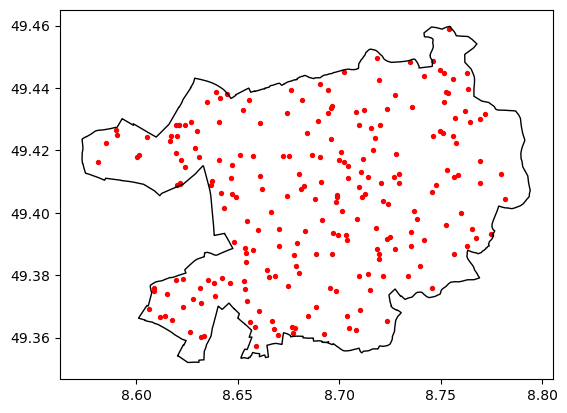

In [62]:
# Keep points in "myPoly"
pnts_in_poly = gdf_points[Sjoin.poly=='poly']

# Plot result
import matplotlib.pyplot as plt
base = hd.boundary.plot(linewidth=1, edgecolor="black")
pnts_in_poly.plot(ax=base, linewidth=1, color="red", markersize=8)
plt.show()

In [63]:
pnts_in_poly

,points
1,POINT (8.65382 49.387)
2,POINT (8.72166 49.4037)
3,POINT (8.76909 49.40968)
7,POINT (8.64597 49.3775)
8,POINT (8.70299 49.39284)
...,...
394,POINT (8.69056 49.41778)
395,POINT (8.70227 49.4162)
396,POINT (8.64149 49.40639)
397,POINT (8.75599 49.42449)


In [66]:
pnts_in_poly.loc[:, 'lon'] = pnts_in_poly.geometry.x
pnts_in_poly.loc[:, 'lat'] = pnts_in_poly.geometry.y

In [68]:
del pnts_in_poly['points']

In [69]:
df1 = pnts_in_poly.iloc[:200].copy()

df2 = pnts_in_poly.iloc[-100:].reset_index(drop=True)

df1_tail = df1.iloc[-100:].reset_index(drop=True)

# now attach lon2 and lat2
df1_tail['lon2'] = df2['lon']
df1_tail['lat2'] = df2['lat']


df1_tail

,lon,lat,lon2,lat2
0,8.681673,49.436255,8.664183,49.381690
1,8.626623,49.429120,8.638298,49.377357
2,8.657504,49.418083,8.752665,49.396174
3,8.747789,49.408750,8.605112,49.424165
4,8.688200,49.369890,8.745959,49.424481
...,...,...,...,...
95,8.637173,49.410095,8.690562,49.417784
96,8.703606,49.366836,8.702268,49.416198
97,8.714224,49.411343,8.641492,49.406389
98,8.698501,49.403413,8.755992,49.424489


In [70]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lon1 = row['lon']
    lat1 = row['lat']
    lon2 = row['lon2']
    lat2 = row['lat2']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a))
    km = 6367 * c
    return km

df1_tail['distance'] = df1_tail.apply(lambda row: haversine(row), axis=1)

In [71]:
df1_tail

,lon,lat,lon2,lat2,distance
0,8.681673,49.436255,8.664183,49.381690,6.194010
1,8.626623,49.429120,8.638298,49.377357,5.813829
2,8.657504,49.418083,8.752665,49.396174,7.298887
3,8.747789,49.408750,8.605112,49.424165,10.455903
4,8.688200,49.369890,8.745959,49.424481,7.365509
...,...,...,...,...,...
95,8.637173,49.410095,8.690562,49.417784,3.953267
96,8.703606,49.366836,8.702268,49.416198,5.486261
97,8.714224,49.411343,8.641492,49.406389,5.287611
98,8.698501,49.403413,8.755992,49.424489,4.770830


In [72]:
filtered_df = df1_tail[df1_tail['distance'] > 2]

In [73]:
filtered_df

,lon,lat,lon2,lat2,distance
0,8.681673,49.436255,8.664183,49.381690,6.194010
1,8.626623,49.429120,8.638298,49.377357,5.813829
2,8.657504,49.418083,8.752665,49.396174,7.298887
3,8.747789,49.408750,8.605112,49.424165,10.455903
4,8.688200,49.369890,8.745959,49.424481,7.365509
...,...,...,...,...,...
95,8.637173,49.410095,8.690562,49.417784,3.953267
96,8.703606,49.366836,8.702268,49.416198,5.486261
97,8.714224,49.411343,8.641492,49.406389,5.287611
98,8.698501,49.403413,8.755992,49.424489,4.770830


In [75]:
filtered_df.to_csv("../run_pairs.csv")